Task 2: Please construct a classification algorithm based on logistic regression for data about the quality of radar signal reflected by the ionosphere, where each example's quality is labeled by one of two possible values: 'b' (bad) and 'g' (good). The model should make a prediction of the quality of signal based on all 34 continuous attributes.

The description of the data is available at https://archive.ics.uci.edu/ml/datasets/ionosphere, the files with data are available at https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/. Dataset is here: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data">ionosphere.data</a> and the description of this dataset is here: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.names">ionosphere.names</a>.

To construct the classification algorithm, you should use the training data. To evaluate it, use the test data. These sets should contain 80% and 20% of all data, respectively. Both sets should contain the same ratio of classes 'b' and 'g' as the whole dataset.

To evaluate the classification algorithm you should use the confusion matrix, accuracy score, ROC curve and AUC score calculated on the test data.

##### Additional hints:

1) Read data from the file using <a href="https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html">numpy.genfromtxt</a>.

2) Classes 'b' (bad) and 'g' (good) can be replaced with a numerical value: 0 and 1, respectively.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

%matplotlib inline

#### Preparing data from file
First we read data from file

In [2]:
file = 'ionosphere.data'
data = np.genfromtxt(file, delimiter=',', dtype=str)

And split it into arrays of features and labels

In [3]:
X = data[:, :-1].astype(np.float32)
y = np.array([0 if i == 'b' else 1 for i in data[:, -1]])

Now we split it into train and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#### Training the model

In [5]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

#### Running the model on test data

In [6]:
y_pred = model.predict(X_test)

#### Evaluating the model
##### Confusion matrix

In [7]:
confusion_matrix(y_test, y_pred)

array([[19,  6],
       [ 1, 45]])

##### Accuracy score

In [8]:
accuracy_score(y_test, y_pred)

0.9014084507042254

##### ROC curve

In [9]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

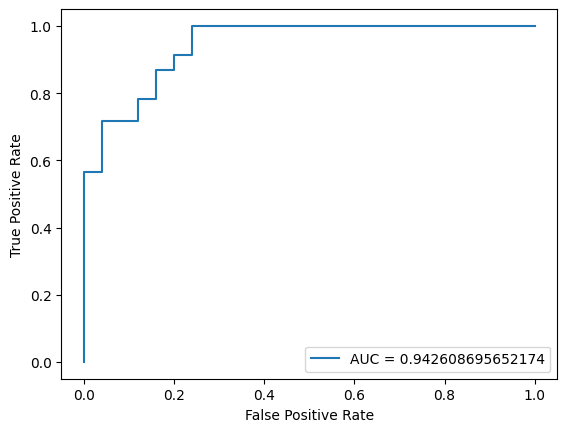

In [10]:
plt.plot(fpr, tpr, label=f'AUC = {auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()